# Perform Team Valuation on NBA Data

The goal of this section is to perform PCA and hypothesis testing of the NBA official team statistics data.


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA 

In [2]:
team_data_path = '../Datasets/nba_team_stats_official.csv'
data = pd.read_csv(team_data_path)
data.head()

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,...,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,CFID,CFPARAMS,year
0,1610612737,Atlanta Hawks,82,56,26,0.683,48.3,34.3,76.9,0.446,...,9,11,4,1,27,23,5,10,Atlanta Hawks,1996-97
1,1610612738,Boston Celtics,82,15,67,0.183,48.5,37.4,85.0,0.440,...,2,27,29,22,21,5,27,10,Boston Celtics,1996-97
2,1610612766,Charlotte Hornets,82,54,28,0.659,48.3,36.4,77.3,0.471,...,26,22,6,6,9,12,11,10,Charlotte Hornets,1996-97
3,1610612741,Chicago Bulls,82,69,13,0.841,48.1,40.0,84.4,0.473,...,7,25,2,3,7,1,1,10,Chicago Bulls,1996-97
4,1610612739,Cleveland Cavaliers,82,42,40,0.512,48.4,33.0,72.8,0.453,...,16,27,7,19,4,29,12,10,Cleveland Cavaliers,1996-97


In [3]:
data.columns

Index(['TEAM_ID', 'TEAM_NAME', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS',
       'PLUS_MINUS', 'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK',
       'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK',
       'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK',
       'DREB_RANK', 'REB_RANK', 'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK',
       'BLKA_RANK', 'PF_RANK', 'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK',
       'CFID', 'CFPARAMS', 'year'],
      dtype='object')

In [4]:
data.isnull().sum()

TEAM_ID            0
TEAM_NAME          0
GP                 0
W                  0
L                  0
W_PCT              0
MIN                0
FGM                0
FGA                0
FG_PCT             0
FG3M               0
FG3A               0
FG3_PCT            0
FTM                0
FTA                0
FT_PCT             0
OREB               0
DREB               0
REB                0
AST                0
TOV                0
STL                0
BLK                0
BLKA               0
PF                 0
PFD                0
PTS                0
PLUS_MINUS         0
GP_RANK            0
W_RANK             0
L_RANK             0
W_PCT_RANK         0
MIN_RANK           0
FGM_RANK           0
FGA_RANK           0
FG_PCT_RANK        0
FG3M_RANK          0
FG3A_RANK          0
FG3_PCT_RANK       0
FTM_RANK           0
FTA_RANK           0
FT_PCT_RANK        0
OREB_RANK          0
DREB_RANK          0
REB_RANK           0
AST_RANK           0
TOV_RANK           0
STL_RANK     

#### No null values that we need to deal with.

In [5]:
metrics = ['MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS',
       'PLUS_MINUS']

def standardize_data(data):
    '''
    for each column, subtract mean and divide by standard deviation
    '''
    
    ans = (data-data.mean())/data.std()
    old_cols = data.columns
    new_cols = [c+"_SD" for c in old_cols]
    ans.columns = new_cols
    return ans

data_metrics_sd = standardize_data(data[metrics])

In [6]:
data_metrics_sd

,MIN_SD,FGM_SD,FGA_SD,FG_PCT_SD,FG3M_SD,FG3A_SD,FG3_PCT_SD,FTM_SD,FTA_SD,FT_PCT_SD,...,REB_SD,AST_SD,TOV_SD,STL_SD,BLK_SD,BLKA_SD,PF_SD,PFD_SD,PTS_SD,PLUS_MINUS_SD
0,-0.318206,-1.255016,-1.365446,-0.383667,0.433160,0.438294,0.303526,-0.052312,-0.177261,0.260513,...,-0.641614,-1.428021,0.303121,0.883600,0.332836,-1.295134,-1.049258,-1.324582,-0.728370,1.177223
1,0.803392,0.118550,0.755884,-0.755328,-0.468853,-0.464470,-0.130334,0.930569,0.974287,-0.170848,...,-1.177055,-0.020384,1.469728,2.422336,-1.348720,2.625867,1.226145,-1.324582,0.176854,-1.588482
2,-0.318206,-0.324536,-1.260689,1.164920,0.119416,-0.362545,3.581585,0.258072,-0.023721,0.725055,...,-1.615144,1.290175,0.053134,-0.435317,-0.748164,-1.155098,-0.252867,-1.314484,-0.088471,0.415021
3,-1.439804,1.270574,0.598748,1.288807,-0.194327,-0.333424,0.930214,-0.776540,-0.676265,-0.270393,...,1.305447,2.018264,-0.946815,1.103420,-1.108497,-1.995313,-0.878602,-1.314484,0.567036,2.353192
4,0.242593,-1.831028,-2.439206,0.049938,-0.390417,-0.537274,1.074834,-1.397307,-1.021730,-1.066751,...,-2.442645,-0.505776,-0.113524,0.334051,-1.348720,-0.875027,0.998604,-1.314484,-1.867704,0.393244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,0.803392,1.669352,1.646319,0.607429,2.276403,2.258384,0.496353,-1.345576,-1.520734,0.492784,...,0.088534,0.901862,-0.113524,0.004322,-0.988386,-1.015062,0.543524,0.634429,1.659548,-0.434290
708,0.803392,2.245364,1.908211,1.226864,1.492044,1.326498,1.074834,0.361533,-0.330801,1.820047,...,1.062064,1.338715,-1.696776,-0.435317,0.693169,-0.875027,-1.049258,0.695017,2.283840,-0.238295
709,-0.318206,1.359191,1.515372,0.359655,2.707801,2.564159,0.978421,0.102880,-0.407570,1.355505,...,1.451476,1.581411,0.136463,1.213329,0.092614,0.805402,0.259099,0.725311,2.080945,1.351440
710,-0.879005,1.314883,0.782073,1.164920,2.550929,2.302066,1.267661,-0.259234,-0.561110,0.791418,...,1.208094,0.222312,0.386450,-1.754233,-0.988386,-0.454919,-0.480407,0.765703,1.846836,0.545684


## PCA
- see which dataset features are the most important

In [48]:
def run_pca(data, n_components=10):
    '''
    given data and the number of principal components to extract, extract the pca and the factor loadings
    returns:
        pca, loadings
    '''
    
    pca = PCA(n_components=n_components)
    pca.fit_transform(data)
    
    # loadings
    a = pca.components_.T * np.sqrt(pca.explained_variance_)
    loadings = pd.DataFrame(a).round(3)
    loadings.index = data_metrics_sd.columns
    loadings.columns = ['pc'+str(i+1) for i in range(n_components)]
    
    print('explained variance per principal component:',pca.explained_variance_ratio_)
    print('total explained variance:',np.sum(pca.explained_variance_ratio_))
    
    return pca, loadings

explained variance per principal component: [0.32247944 0.11970697 0.11701209 0.07084364 0.06199939]
total explained variance: 0.6920415383472178


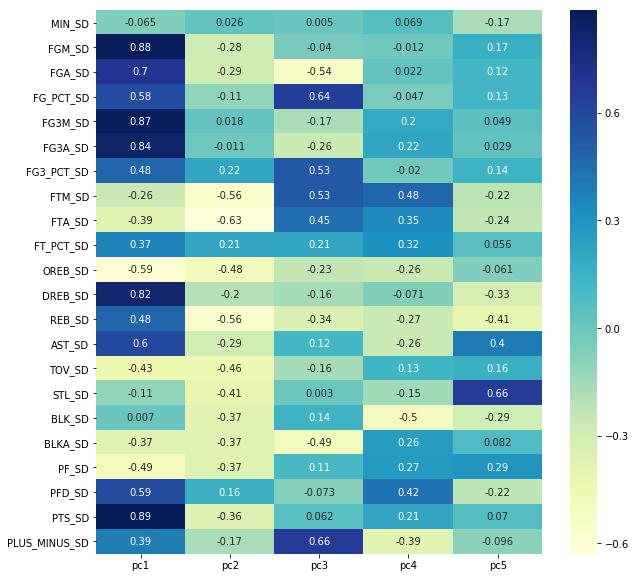

In [51]:
# run PCA on all teams data
pca_all, loadings_all = run_pca(data_metrics_sd, 5)


fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(ax=ax,data=loadings_all, annot=True, cmap="YlGnBu")


### Insights:
- PC1 (32%) "Shooting":
    - field goals made and attempted, 3 pointers taken and made
    - defensive rebounds
    - points
- PC2 (12%) "Second Chance Opportunities":
    - negative correlation with free throws attempted and made
    - negative correlation with rebounds (mostly offensive)
- PC3 (12%) "Clutch":
    - pos corr w/ plus-minus
    - pos corr w/ field goal percentage, and fewer attempts
    - negative correlation with attempts
    - negative correlation with blocks against
- PC4 (7%) "Small Ball":
    - positive correlation w/ free throws made
    - negative correlation w/ blocks
- PC5 (6%) "Passing":
    - steals and assists
    
PC1 seems to capture scoring ability. PC2 captures the inability to draw fouls and get rebounds, specifically offensive rebounds. PC3 talks about fewer, better quality shooting attempts and having a greater plus-minus. It looks like PC3 is talking about fewer shots, but better shots and from 3 point range. PC4 mentions converting free throws and not getting any blocks. PC5 is highly correlated with completing passes (assists) and intercepting passes (steals).

    

## Investigate best NBA teams from each season
- consider top 5 from each season (based on games won)
- perform PCA and see how it compares to the PCA above
- calculate how far away a team is from a top team in terms of stats

Questions:
1. What are the factors that top teams have in common?
2. Are teams becoming better each year?


### 1. What are the factors that top teams have in common?

In [9]:
def fix_year(data):
    '''
    fixes year format from string 'YYYY-YY' (e.g. '2004-05') to be an integer YYYY (e.g. 2004)
    returns:
        data with fixed year
    '''
    ans = data.copy()
    ans.year = [int(s[:4]) for s in ans.year.values]
    return ans

data = fix_year(data)

In [10]:
def top_5_per_year(data):
    '''
    extracts the top 5 teams per year based on total wins
    '''
    # W
    years = data.year.unique()
    
    ans = pd.DataFrame({})
    
    for y in years:
        temp = data[data.year == y]
        temp = temp.sort_values('W', ascending=False).head()
        ans = pd.concat([ans, temp], axis=0)
    
    return ans
        
top5_data = top_5_per_year(data)

In [11]:
top5_data.head()

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,...,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,CFID,CFPARAMS,year
3,1610612741,Chicago Bulls,82,69,13,0.841,48.1,40.0,84.4,0.473,...,7,25,2,3,7,1,1,10,Chicago Bulls,1996
26,1610612762,Utah Jazz,82,64,18,0.780,48.4,38.2,75.8,0.504,...,3,12,10,28,6,2,2,10,Utah Jazz,1996
13,1610612748,Miami Heat,82,61,21,0.744,48.3,34.4,76.0,0.453,...,18,8,12,23,3,22,4,10,Miami Heat,1996
24,1610612760,Seattle SuperSonics,82,57,25,0.695,48.2,36.5,78.2,0.467,...,1,16,18,14,14,4,3,10,Seattle SuperSonics,1996
9,1610612745,Houston Rockets,82,57,25,0.695,48.4,37.0,79.1,0.468,...,11,24,8,2,9,5,7,10,Houston Rockets,1996


In [12]:
top5_sd = standardize_data(top5_data[metrics])

In [13]:
top5_sd.describe()

,MIN_SD,FGM_SD,FGA_SD,FG_PCT_SD,FG3M_SD,FG3A_SD,FG3_PCT_SD,FTM_SD,FTA_SD,FT_PCT_SD,...,REB_SD,AST_SD,TOV_SD,STL_SD,BLK_SD,BLKA_SD,PF_SD,PFD_SD,PTS_SD,PLUS_MINUS_SD
count,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,...,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02
mean,6.703897e-14,2.224147e-15,-1.931788e-15,-2.834307e-15,-1.387779e-16,-3.682240e-16,9.475754e-15,-2.940935e-15,3.890407e-15,-4.505655e-15,...,1.877572e-14,6.833076e-16,1.887379e-16,2.504941e-15,1.512679e-15,-1.132427e-15,-2.524832e-15,-7.919591e-16,5.125530e-16,1.457197e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.276820e+00,-2.418792e+00,-2.521382e+00,-2.574605e+00,-1.706623e+00,-1.692140e+00,-2.417981e+00,-2.317486e+00,-2.492961e+00,-2.536360e+00,...,-2.915108e+00,-2.131060e+00,-2.559352e+00,-2.216036e+00,-1.808391e+00,-2.050509e+00,-2.117808e+00,-1.313925e+00,-2.042869e+00,-2.212993e+00
25%,-6.875184e-01,-6.553447e-01,-7.894617e-01,-6.298199e-01,-7.325693e-01,-6.794526e-01,-6.131214e-01,-6.748498e-01,-7.140394e-01,-4.997073e-01,...,-6.161391e-01,-6.695230e-01,-5.632842e-01,-8.061599e-01,-7.030926e-01,-8.007633e-01,-6.820950e-01,-1.296325e+00,-7.614432e-01,-7.729253e-01
50%,-9.821692e-02,-8.852227e-02,-2.447943e-02,-2.626578e-02,-1.759674e-01,-2.380248e-01,-2.919626e-02,-7.254978e-02,-4.694377e-02,1.694786e-01,...,-2.695608e-02,-4.315013e-02,-2.003628e-01,-1.012219e-01,-2.763246e-02,3.240083e-02,-9.834369e-02,6.773274e-01,-1.282682e-01,-2.622346e-02
75%,4.910846e-01,6.042607e-01,6.487050e-01,5.940537e-01,5.545727e-01,4.111337e-01,6.608971e-01,6.392594e-01,5.923562e-01,6.349992e-01,...,5.160165e-01,5.936623e-01,7.296232e-01,7.121682e-01,6.478277e-01,6.225587e-01,6.747324e-01,7.678388e-01,5.388269e-01,5.738048e-01
max,4.026894e+00,2.493669e+00,2.325546e+00,2.522074e+00,2.920131e+00,3.189532e+00,2.518841e+00,3.376987e+00,3.251474e+00,2.031561e+00,...,3.924036e+00,3.046956e+00,2.249356e+00,3.423468e+00,3.472479e+00,3.226196e+00,3.183285e+00,1.059487e+00,2.434583e+00,2.853912e+00


#### PCA

In [14]:
top5_sd

,MIN_SD,FGM_SD,FGA_SD,FG_PCT_SD,FG3M_SD,FG3A_SD,FG3_PCT_SD,FTM_SD,FTA_SD,FT_PCT_SD,...,REB_SD,AST_SD,TOV_SD,STL_SD,BLK_SD,BLKA_SD,PF_SD,PFD_SD,PTS_SD,PLUS_MINUS_SD
3,-1.276820,0.814195,0.685424,0.443165,-0.454268,-0.484705,0.236224,-1.058132,-0.825222,-0.354232,...,0.874147,1.251354,-0.654015,0.929072,-1.685580,-1.356206,-0.603210,-1.293811,0.082790,2.427226
26,0.491085,0.058432,-1.419807,2.522074,-1.254384,-1.276678,0.076972,2.172387,1.769039,0.285859,...,-1.390164,1.543661,1.069862,1.362880,-0.334660,0.032401,2.173553,-1.293811,0.082790,1.360509
13,-0.098217,-1.537068,-1.370848,-0.898066,0.206696,0.242353,-0.241533,-0.565341,-0.009883,-1.168893,...,-1.020480,-0.794798,1.523514,0.061456,0.033773,0.448983,1.731796,-1.283754,-1.168484,-0.399574
24,-0.687518,-0.655345,-0.832301,0.040796,-0.315118,-0.199075,-0.825458,1.241559,1.213126,-0.208757,...,-1.482585,0.165641,0.706941,3.423468,-0.825904,1.004426,0.848280,-1.293811,-0.248873,0.773814
9,0.491085,-0.445410,-0.611986,0.107857,0.171909,0.203403,-0.188449,-0.236813,-0.158126,-0.121472,...,-0.281113,0.583223,2.158626,0.603716,-1.439958,0.032401,-0.666318,-1.293811,-0.294100,-0.932933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,-0.687518,2.199761,2.276587,0.644350,2.120016,2.345626,-0.719290,-0.236813,-0.009883,-0.499707,...,3.924036,1.167837,0.797671,-0.697708,0.647828,0.032401,-0.666318,0.868407,2.434583,2.053875
709,-0.098217,0.898169,1.542204,-0.562758,2.120016,2.098946,0.289308,-0.127304,-0.565796,1.071425,...,1.012779,0.875530,0.525480,1.037524,-0.457471,1.421008,0.658955,0.737668,1.545123,-0.026223
695,-1.276820,1.779892,1.640122,0.912596,1.145962,1.397855,-1.037794,-0.565341,-0.158126,-0.877943,...,1.151410,0.959046,0.888401,0.820620,1.507504,-1.078485,0.027873,0.868407,1.635577,-0.239567
694,-0.098217,1.485984,1.860437,-0.026266,1.632989,1.644535,0.130056,1.132050,0.583091,0.925950,...,2.075618,0.249157,0.344019,-0.806160,-0.825904,0.310122,0.911388,0.989089,2.072769,0.080448


In [45]:
# run PCA on top 5 of teams of each season, approximately top 15% of teams.
top5_pca, top5_loadings = run_pca(top5_sd)

explained variance per principal component: [0.31972458 0.13020561 0.10195598 0.07372092 0.06856767 0.05392901
 0.04560334 0.04024321 0.03648109 0.02807241]
total explained variance: 0.8985038488709906


#### PCA Heatmap

Text(0.5,1,'Principal Component Correlation Matrix')

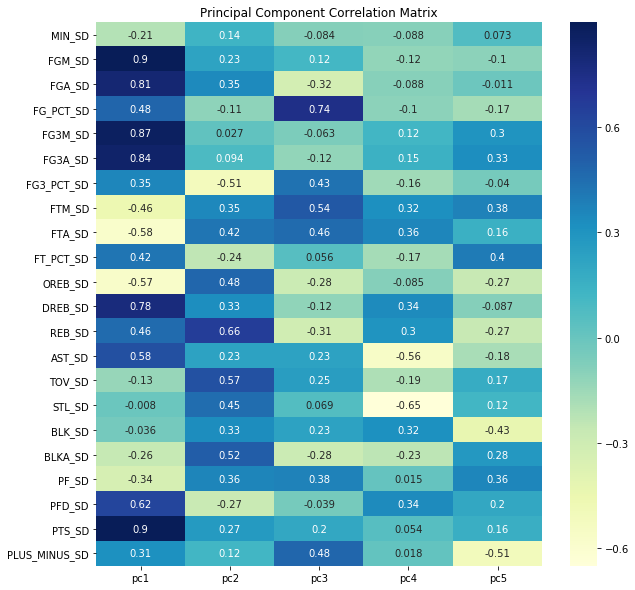

In [18]:
# plot heatmap
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(ax=ax,data=top5_loadings.iloc[:,:5], annot=True, cmap="YlGnBu")
ax.set_title('Principal Component Correlation Matrix')

Principal component descriptions:
1. PC1 (32%) "Shooting":
    - strong positive correlation (>0.85) with FGA, FGM, FG3A, FG3M
    - taking lots of shots to make lots of shots
    - 0.9 correlation with points (this makes sense)
    - DREB are strong positive correlated (0.78)
    - FT are less important (negative correlation)
    - Offensive rebounds are less important
    - high personal fouls drawn
    - Field goal percentage and 3pt percentage are less important
2. PC2 (13%) "Second Chance Opportunities"
    - positive: rebounds, turnovers, blocks against
    - negative: 3pt %
3. PC3 (10%) "Clutch"
    - field goal percentage
    - free throws made and attempted
    - plus-minus
4. PC4 (7.3%) "Small Ball"
    - nothing strong positive
    - negative: steals
5. PC5 (6.8%) "Passing"
    - nothing positive
    - negative plus-minus




#### PCA on average teams

In [19]:
# Perform PCA on the not top 5 teams
def bottom_teams_per_year(data):
    '''
    extracts the bottom 25 teams per year based on total wins
    '''
    # W
    years = data.year.unique()
    
    ans = pd.DataFrame({})
    
    for y in years:
        temp = data[data.year == y]
        m, n = temp.shape
        temp = temp.sort_values('W', ascending=True).head(m-5)
        ans = pd.concat([ans, temp], axis=0)
    
    return ans
average_teams = bottom_teams_per_year(data)

In [20]:
avg_team_sd = standardize_data(average_teams[metrics])

In [21]:
avg_team_pca, avg_team_loadings = run_pca(avg_team_sd)


explained variance per principal component: [0.3174584  0.12172046 0.11170801 0.06864994 0.06171138 0.0478498
 0.04404819 0.0430711  0.03637536 0.0335133 ]
total explained variance: 0.8861059471321991


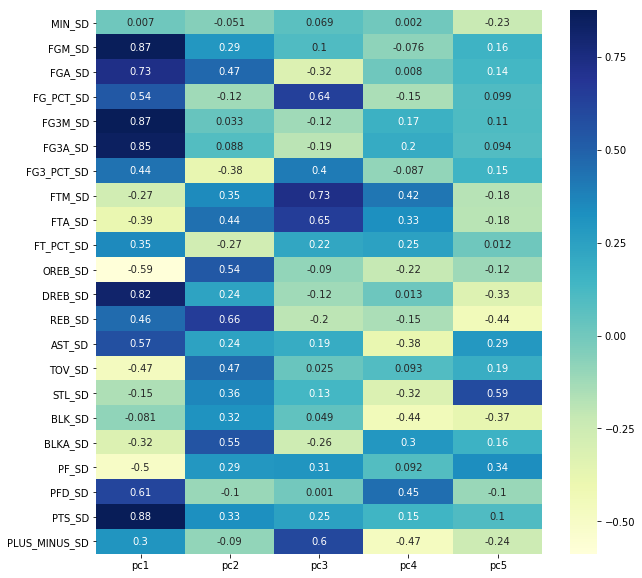

In [22]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(ax=ax,data=avg_team_loadings.iloc[:,:5], annot=True, cmap="YlGnBu")

Principal component descriptions
- PC1 (32%) "Shooting"
    - fg attempted and made
    - 3pts attempted and made
    - dreb
    - points
    - personal fouls drawn
    - ability to score points
- PC2 (12%) "Second Chance Opportunities"
    - rebounds, offensive
    - blocks against
    - turnovers
    - inability to convert on shots and losing possession
- PC3 (11%) "Clutch"
    - fg percentage
    - ft attempted and made
    - plus-minus
    - clutch moments
- PC4 (7%) "Small Ball"
    - negative blocks, +/-
    - positive ft attempted and made
- PC5 (6%) "Desperation"
    - increase steals at the expense of defense and blocks

PC5 is desperation instead of passing because we can see only a 0.29 correlation between with assists. We can also see that it has a negative correlation with blocks (-0.37) and a negative correlation with rebounds (-0.44), specifically defensive rebounds (-0.33). As a result, this demonstrates a team that is getting more steals at the expense of blocks and rebounds and therefore, we labelled it has "Desperation".

In [23]:
# blka must be blocks against. Verified by comparing to https://www.teamrankings.com/nba/stat/opponent-blocks-per-game
data[data.year == 2019][['TEAM_NAME', 'BLKA', 'year']].head()

,TEAM_NAME,BLKA,year
682,Atlanta Hawks,6.4,2019
683,Boston Celtics,5.5,2019
684,Brooklyn Nets,5.3,2019
685,Charlotte Hornets,5.0,2019
686,Chicago Bulls,5.9,2019


### 2. Are teams becoming better each year?
- check key metrics over time
- how are the best teams changing over the years?
    - see how the average of the top 5 teams are changing over the years

In [24]:
def avg_stat_per_year(data, stat='W'):
    '''
    given data and a stat, return the years and average value of the stat for each year
    '''
    years = data.year.unique()
    stats = [np.mean(data[data.year == y][stat].values) for y in years]
    return years, stats


In [25]:
print(len(metrics))

22


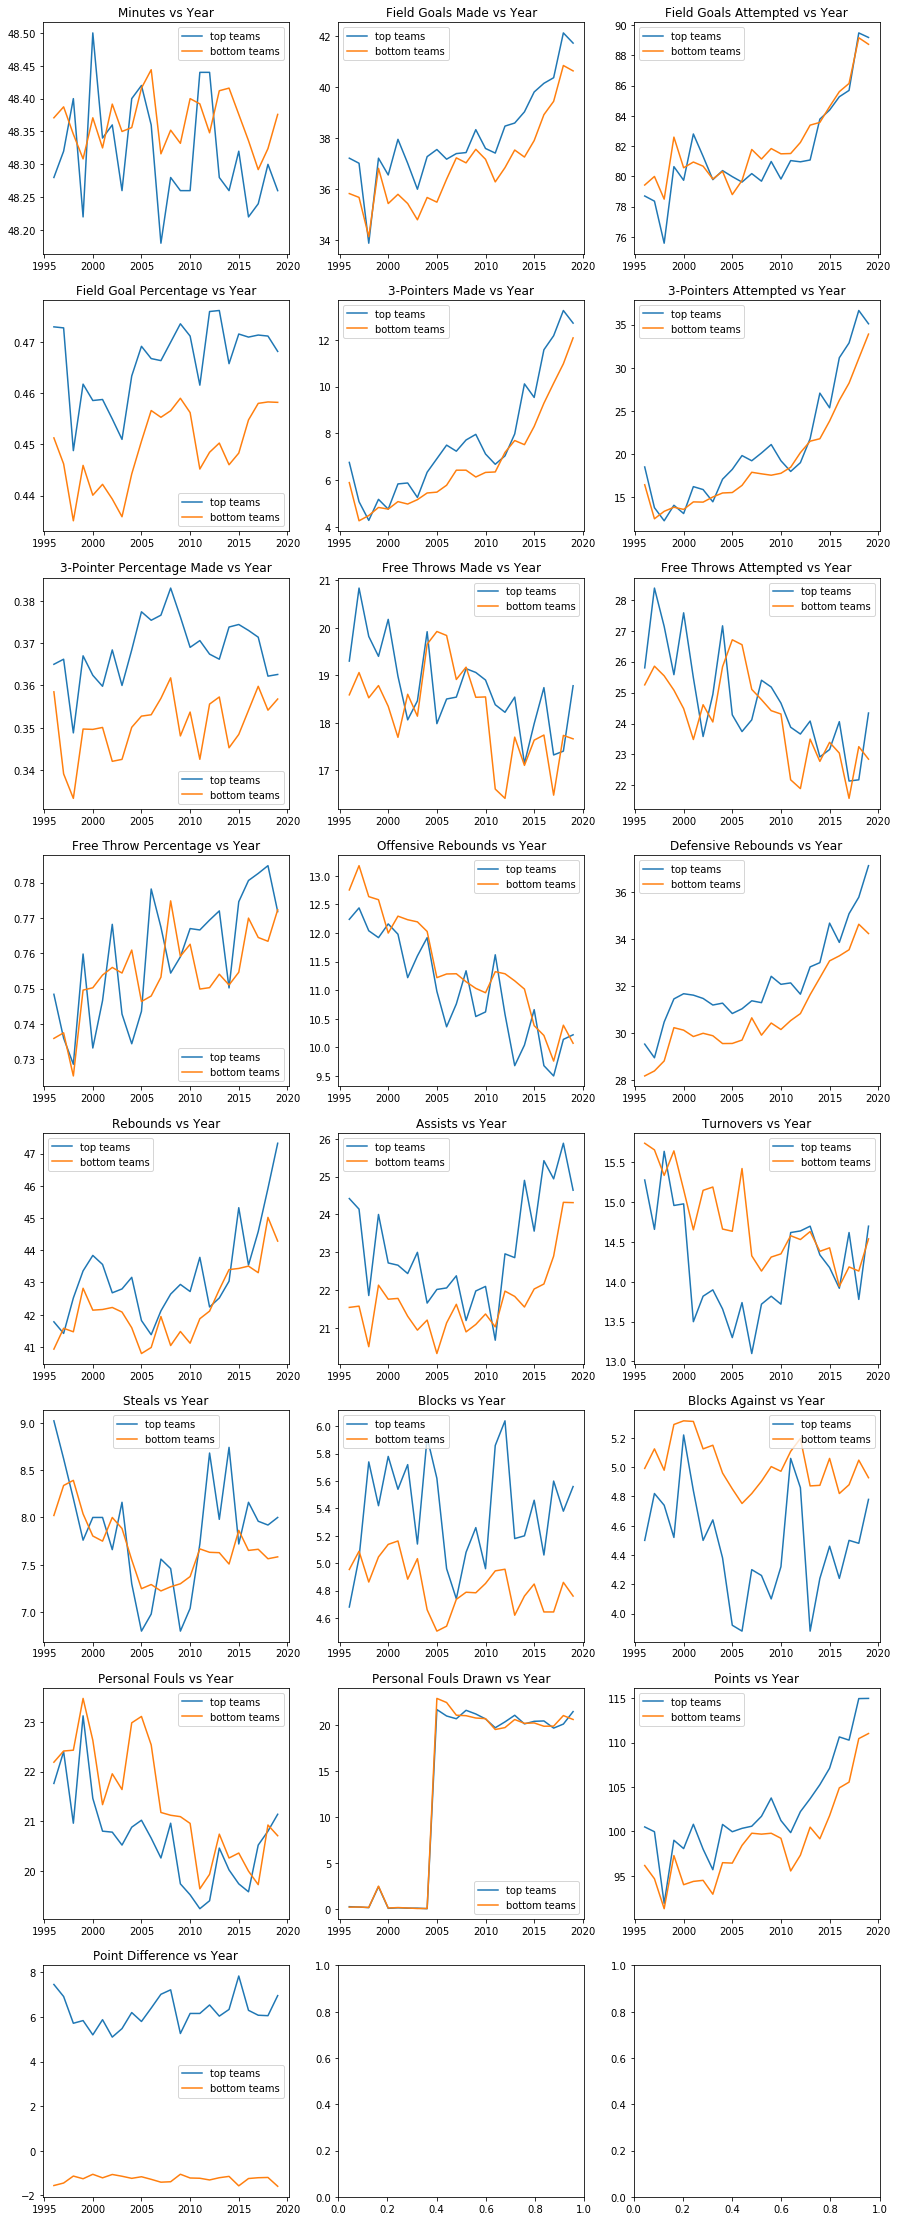

In [41]:
fig, axs = plt.subplots(8, 3, figsize=(15,40))


mapping = {
    'MIN': 'Minutes',
     'FGM': 'Field Goals Made',
     'FGA': 'Field Goals Attempted',
     'FG_PCT': 'Field Goal Percentage',
     'FG3M': '3-Pointers Made',
     'FG3A': '3-Pointers Attempted',
     'FG3_PCT':'3-Pointer Percentage Made',
     'FTM':'Free Throws Made',
     'FTA':'Free Throws Attempted',
     'FT_PCT': 'Free Throw Percentage',
     'OREB': 'Offensive Rebounds',
     'DREB': 'Defensive Rebounds',
     'REB': 'Rebounds',
     'AST': 'Assists',
     'TOV':'Turnovers',
     'STL': 'Steals',
     'BLK': 'Blocks',
     'BLKA': 'Blocks Against',
     'PF': 'Personal Fouls',
     'PFD': 'Personal Fouls Drawn',
     'PTS': 'Points',
     'PLUS_MINUS': 'Point Difference'
}




for i, stat in enumerate(metrics):
    
    # create figures
    #fig, ax1 = plt.subplots(1, 1, figsize=(20,10))
    
    a = i//3
    b = i%3
    
    # plot top teams
    x, y = avg_stat_per_year(top5_data, stat=stat)
    x1, y1 = avg_stat_per_year(average_teams, stat=stat)
    axs[a,b].plot(x,y)
    axs[a,b].plot(x1,y1)
    axs[a,b].set_title(mapping.get(stat)+" vs Year")
    axs[a,b].legend(['top teams', 'bottom teams'])
    



### Plot subset of graphs

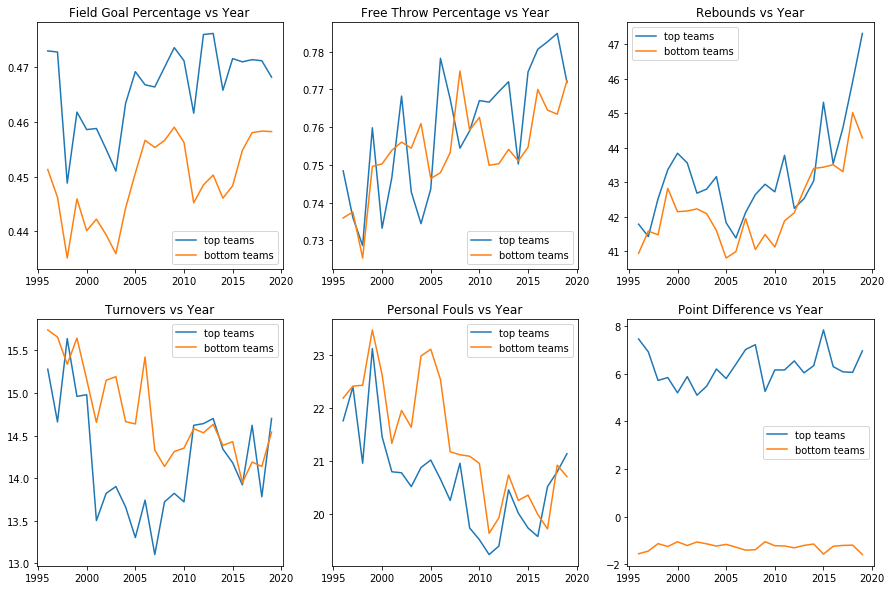

In [42]:
subset = [
    'FG_PCT', 
          'FT_PCT', 
          'REB', 
          'TOV', 
          'PF',
          'PLUS_MINUS'
]

fig, axs = plt.subplots(2, 3, figsize=(15,10))

for i, stat in enumerate(subset):
    
    # create figures
    #fig, ax1 = plt.subplots(1, 1, figsize=(20,10))
    
    a = i//3
    b = i%3
    
    # plot top teams
    x, y = avg_stat_per_year(top5_data, stat=stat)
    x1, y1 = avg_stat_per_year(average_teams, stat=stat)
    axs[a,b].plot(x,y)
    axs[a,b].plot(x1,y1)
    axs[a,b].set_title(mapping.get(stat)+" vs Year")
    axs[a,b].legend(['top teams', 'bottom teams'])

### Hypothesis testing
Which stats are better for the top teams?

In [28]:
from scipy import stats
np.random.seed(23)

def hyp_test_stats(top5_data, data, metrics=metrics):
    '''
    perform differnce of means hypothesis testing to see which mean is statistically greater than the other
    returns:
        dataframe of (metric, t-statistic, p-value)
    ''' 
    
    tstats = list()
    pvals = list()
    
    
    for m in metrics:
        a = data[m].values
        b = top5_data[m].values
        t, p = stats.ttest_ind(b, a)
        tstats.append(t)
        pvals.append(p)
        
    ans = pd.DataFrame({'metric':metrics, 't_stat':tstats, 'pval':pvals})
    ans['test_greater'] = ans.apply(lambda x: x.t_stat > 0 and x.pval/2 <= 0.05, axis=1)
    ans['test_smaller'] = ans.apply(lambda x: x.t_stat < 0 and x.pval/2 <= 0.05, axis=1)
        
    return ans.round(4)

In [29]:
results = hyp_test_stats(top5_data, data, metrics)
results

,metric,t_stat,pval,test_greater,test_smaller
0,MIN,-2.2930,0.0221,False,True
1,FGM,4.1350,0.0000,True,False
2,FGA,-1.3496,0.1775,False,False
3,FG_PCT,9.0075,0.0000,True,False
4,FG3M,3.1597,0.0016,True,False
5,FG3A,2.0916,0.0368,True,False
6,FG3_PCT,7.3456,0.0000,True,False
7,FTM,2.2790,0.0229,True,False
8,FTA,1.7989,0.0724,True,False
9,FT_PCT,1.3255,0.1854,False,False


In [30]:
results[results.metric.isin(subset)].reset_index(drop=True)

,metric,t_stat,pval,test_greater,test_smaller
0,FT_PCT,1.3255,0.1854,False,False
1,PF,-3.4401,0.0006,False,True


In [31]:
results[results.test_greater == True]

,metric,t_stat,pval,test_greater,test_smaller
1,FGM,4.1350,0.0000,True,False
3,FG_PCT,9.0075,0.0000,True,False
4,FG3M,3.1597,0.0016,True,False
5,FG3A,2.0916,0.0368,True,False
6,FG3_PCT,7.3456,0.0000,True,False
7,FTM,2.2790,0.0229,True,False
8,FTA,1.7989,0.0724,True,False
11,DREB,5.0526,0.0000,True,False
12,REB,3.8677,0.0001,True,False
13,AST,5.5738,0.0000,True,False


In [53]:
results[results.test_smaller == True]

,metric,t_stat,pval,test_greater,test_smaller
0,MIN,-2.2930,0.0221,False,True
10,OREB,-2.3299,0.0201,False,True
14,TOV,-3.5478,0.0004,False,True
17,BLKA,-6.3525,0.0000,False,True
18,PF,-3.4401,0.0006,False,True


## Results

PCA Analysis:
We can see that the first 5 principal components for each of the datasets (all teams, top 15\%, and bottom 85\%) are all similar except for the fifth principal component in the bottom 85% of teams, "Desperation". This could be a result that causes teams to lose against the top 15\% of teams, but could perhaps be due to other factors that were not captured in the data.

Visual Analysis:
Over the years, we can see visually that the top teams (blue lines) are above the bottom teams (orange lines) in the scoring statistics. Top teams also perform better in total rebounds over the years than bottom teams. 

Hypothesis Testing:
From the hypothesis testing of the team statistics, we can see that the top 15\% of teams are better than the bottom 85\% in terms of shooting, rebounds, assists, blocks. We can also see that the top teams have fewer turnovers, blocks against, and personal fouls. These results align with what was expected. An interesting result is that the top teams play fewer minutes on average, which implies that the top teams go into overtime less than the bottom teams. Another interesting result is that top teams have fewer offensive rebounds than bottom teams. This could present an area for improvement for top teams or an area where bottom teams don't need to focus as much.
